<a href="https://colab.research.google.com/github/Chris-o99/tensorflow/blob/master/deep-version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train.shape:
(60000, 784)
(10000, 784)
Epoch 1/30
235/235 [==============================] - 10s 42ms/step - loss: 0.2522 - val_loss: 0.1839
Epoch 2/30
235/235 [==============================] - 10s 43ms/step - loss: 0.1593 - val_loss: 0.1464
Epoch 3/30
235/235 [==============================] - 10s 42ms/step - loss: 0.1407 - val_loss: 0.1349
Epoch 4/30
235/235 [==============================] - 10s 43ms/step - loss: 0.1307 - val_loss: 0.1259
Epoch 5/30
235/235 [==============================] - 10s 43ms/step - loss: 0.1245 - val_loss: 0.1207
Epoch 6/30
235/235 [==============================] - 10s 43ms/step - loss: 0.1198 - val_loss: 0.1173
Epoch 7/30
235/235 [==============================] - 10s 42ms/step - loss: 0.1161 - val_loss: 0.1140
Epoch 8/30
235/235 [==============================] - 10s 43ms/step - loss: 0.1127 - val_loss: 0.1108
Epoch 9/30
235/235 [==============================] - 10s 43ms/step - loss: 0.1097 - val_loss: 0.1077
Epoch 10/30
235/235 [====================

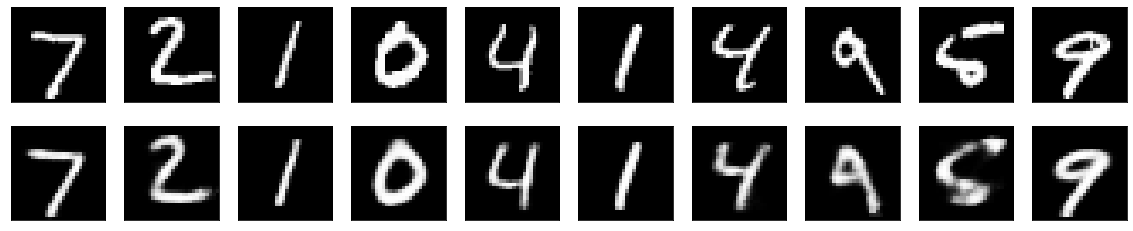

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("x_train.shape:")
print(x_train.shape)
print(x_test.shape)


# this is the size of our encoded representations
encoding_dim = 16 #for example from 784 to 32 compression


#create encoder-part with shape 784->128->64->32
encoded_input = Input(shape=(784,))
encoded = Dense(units=512, activation='relu', name='encoded1')(encoded_input)
encoded = Dense(units=256, activation='relu')(encoded)
encoded = Dense(units=128, activation='relu')(encoded)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=encoding_dim, activation='relu')(encoded)

#create encoder-moderl from encoding layer
encoder = Model(encoded_input, encoded)

#create decoder-part with shape 32->64->128->784
decodedInput = Input(shape=(encoding_dim,))
decoded = Dense(units=64, activation='relu')(decodedInput)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=256, activation='relu')(decoded)
decoded = Dense(units=512, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

#create decoder-model from decoding layer
decoder = Model(decodedInput,decoded)


# this model maps an input to its reconstruction
autoencoder_input = Input(shape=(784,))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img)




# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model

# create the decoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()